In [1]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('./data/post-eda/train2.csv')
train.drop(['Unnamed: 0'], axis='columns', inplace=True);
train.drop([c for c in train.columns if 'culex' in c.lower()], axis='columns', inplace=True);
train['WeekofYear'] = train.DayofYear // 7
train.head()

,Trap,Latitude,Longitude,WnvPresent,Year,DayofYear,WeekofYear
0,T002,41.954690,-87.800991,0,2007,149,21
1,T002,41.954690,-87.800991,0,2007,149,21
2,T007,41.994991,-87.769279,0,2007,149,21
3,T015,41.974089,-87.824812,0,2007,149,21
4,T015,41.974089,-87.824812,0,2007,149,21


In [36]:

train = pd.read_csv('data/raw/West_Nile_Virus__WNV__Mosquito_Test_Results.csv')
train = train[['SEASON YEAR', 'WEEK', 'TRAP', 'NUMBER OF MOSQUITOES', 'RESULT', 'LATITUDE', 'LONGITUDE']]
train.columns = ['year','week','trap','num_mosquitoes','wnv','latitude','longitude']
train.columns = ['Year','WeekofYear','Trap','NumMosquitoes','WnvPresent','Latitude','Longitude']
train['WnvPresent'] = (train.WnvPresent == 'positive').astype('int')
train.dropna(axis='index', how='any', inplace=True)
train.sort_values(['Year', 'WeekofYear'], inplace=True)
train.head()

,Year,WeekofYear,Trap,NumMosquitoes,WnvPresent,Latitude,Longitude
1071,2007,21,T129,2,0,41.891513,-87.609785
1736,2007,21,T094,3,0,41.721288,-87.665236
5249,2007,21,T007,1,0,41.995492,-87.769609
6358,2007,21,T087,1,0,41.688193,-87.676873
9246,2007,21,T054,2,0,41.922512,-87.632378


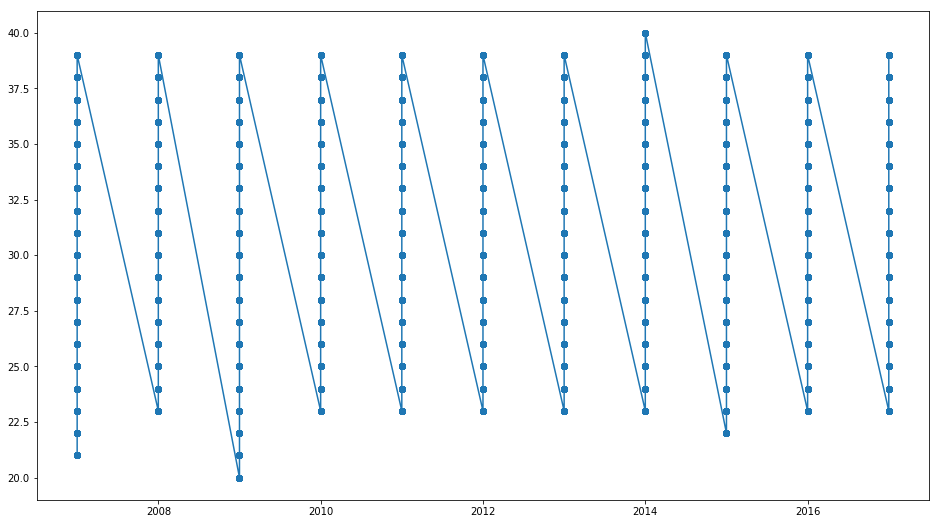

In [37]:
plt.plot(train.Year, train.WeekofYear, '-o')

In [38]:
#train = pd.read_csv('./data/post-eda/train.csv')
#train.drop(['Unnamed: 0'], axis='columns', inplace=True);





#test = pd.read_csv('./data/post-eda/test.csv')
#test.drop(['Unnamed: 0'], axis='columns', inplace=True);

#test2 = pd.read_csv('./data/post-eda/test2.csv')
#test2.drop(['Unnamed: 0'], axis='columns', inplace=True);

weather = pd.read_csv('./data/post-eda/weather.csv')
weather.drop(['Unnamed: 0'], axis='columns', inplace=True);

spray = pd.read_csv('./data/post-eda/spray.csv')
spray.drop(['Unnamed: 0'], axis='columns', inplace=True);
spray['Date'] = pd.to_datetime(spray['Date'])
spray['Year']= spray.Date.dt.year
spray['DayofYear']= spray.Date.dt.dayofyear
spray['WeekofYear'] = spray.DayofYear // 7


In [39]:
weather.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,83.0,50.0,67.0,14.0,51.0,56.0,448.0,1849.0,0,0.00,29.10,29.82,1.7,27.0,9.2
1,2007-05-02,59.0,42.0,51.0,-3.0,42.0,47.0,447.0,1850.0,1,0.00,29.38,30.09,13.0,4.0,13.4
2,2007-05-03,66.0,46.0,56.0,2.0,40.0,48.0,446.0,1851.0,0,0.00,29.39,30.12,11.7,7.0,11.9
3,2007-05-04,66.0,49.0,58.0,4.0,41.0,50.0,444.0,1852.0,1,0.05,29.31,30.05,10.4,8.0,10.8
4,2007-05-05,66.0,53.0,60.0,5.0,38.0,49.0,443.0,1853.0,0,0.05,29.40,30.10,11.7,7.0,12.0


In [40]:
spray.head()

,Date,Latitude,Longitude,Year,DayofYear,WeekofYear
0,2011-08-29,42.391623,-88.089163,2011,241,34
1,2011-08-29,42.391348,-88.089163,2011,241,34
2,2011-08-29,42.391022,-88.089157,2011,241,34
3,2011-08-29,42.390637,-88.089158,2011,241,34
4,2011-08-29,42.390410,-88.088858,2011,241,34


In [41]:
train.head()

,Year,WeekofYear,Trap,NumMosquitoes,WnvPresent,Latitude,Longitude
1071,2007,21,T129,2,0,41.891513,-87.609785
1736,2007,21,T094,3,0,41.721288,-87.665236
5249,2007,21,T007,1,0,41.995492,-87.769609
6358,2007,21,T087,1,0,41.688193,-87.676873
9246,2007,21,T054,2,0,41.922512,-87.632378


In [42]:
def pick_quadrants(data):
    data = data.groupby('Trap').mean()
    print(data.shape)
    
    y_median = np.median(data.Latitude)

    north = data[data.Latitude >= y_median]
    south = data[data.Latitude < y_median]

    north_x_median = np.median(north.Longitude)
    south_x_median = np.median(south.Longitude)
    
    return y_median, north_x_median, south_x_median

def split_into_quadrants(data, y_median, north_x_median, south_x_median):
    north = data[data.Latitude >= y_median]
    south = data[data.Latitude < y_median]

    nw = north[north.Longitude > north_x_median]
    ne = north[north.Longitude <= north_x_median]
    sw = south[south.Longitude > south_x_median]
    se = south[south.Longitude <= south_x_median]
    
    return nw, ne, sw, se


(161, 6)
north/south divide: 41.836911889000014
northwest/northeast divide: -87.72839753200002
southwest/southeast divide: -87.64932369500043


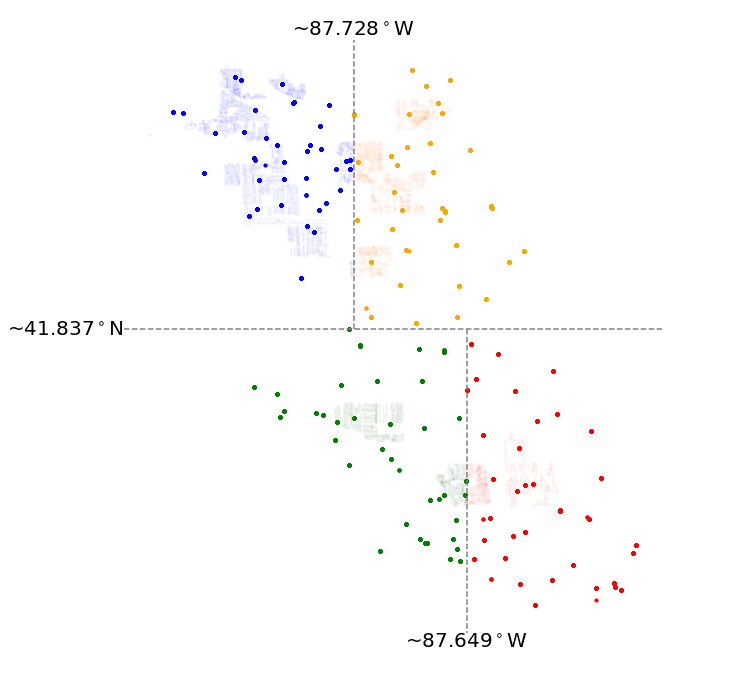

In [111]:
# drop outliers / anomalies
spray = spray[spray.Longitude > -88]

y_median, north_x_median, south_x_median = pick_quadrants(train)

print(f'north/south divide: {y_median}')
print(f'northwest/northeast divide: {north_x_median}')
print(f'southwest/southeast divide: {south_x_median}')

test_nw, test_ne, test_sw, test_se = split_into_quadrants(train, y_median, north_x_median, south_x_median)
for quad, color in zip([test_nw, test_ne, test_sw, test_se], 
                       ['orange', 'blue', 'red', 'green']):
    plt.scatter(quad.Longitude, quad.Latitude, s=10, color=color)

spray_nw, spray_ne, spray_sw, spray_se = split_into_quadrants(spray, y_median, north_x_median, south_x_median)
for quad, color in zip([spray_nw, spray_ne, spray_sw, spray_se], 
                       ['orange', 'blue', 'red', 'green']):
    plt.scatter(quad.Longitude, quad.Latitude, s=3, alpha=0.01, color=color)

plt.rcParams["figure.figsize"] = [12, 12]
plt.axis('equal')

x = plt.xlim()
plt.plot(x, [y_median, y_median], '--', color='grey')
y = plt.ylim()
plt.plot([north_x_median, north_x_median], [y_median, y[1]], '--', color='grey')
plt.plot([south_x_median, south_x_median], [y_median, y[0]], '--', color='grey')
#plt.plot(x, [y_median, y_median], '--', color='grey')

ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.text(north_x_median, y[1], 
        r'~{0:.3f}$^\circ$W'.format(-1*north_x_median),
        fontsize=20,
        va='bottom',
        ha='center')

ax.text(south_x_median, y[0], 
        r'~{0:.3f}$^\circ$W'.format(-1*south_x_median),
        fontsize=20,
        va='top',
        ha='center')

ax.text(x[0], y_median, 
        r'~{0:.3f}$^\circ$N'.format(y_median),
        fontsize=20,
        va='center',
        ha='right')


plt.show()

   Trap    Year  WeekofYear  NumMosquitoes  WnvPresent   Latitude  Longitude
0  220A  2008.0   35.545455      10.545455    0.181818  41.987054 -87.728398


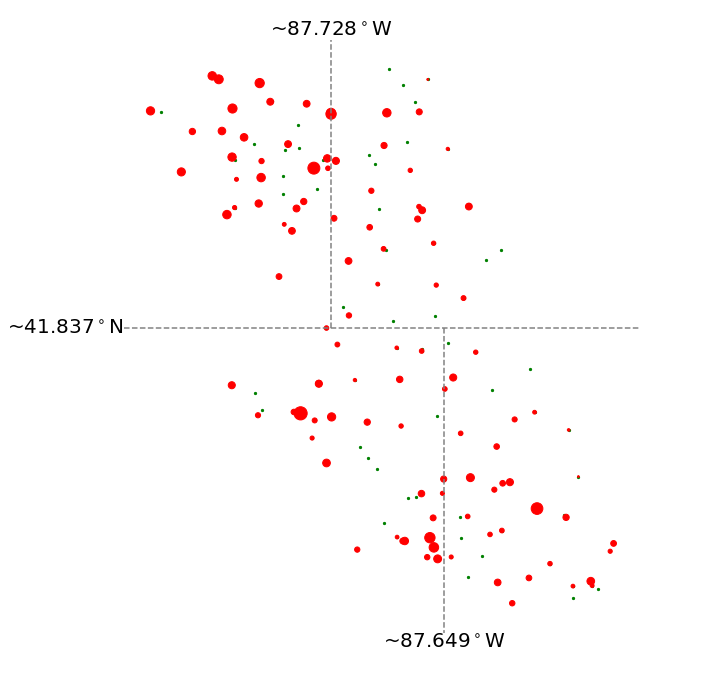

In [112]:
temp = train.groupby('Trap').mean().reset_index()
print(temp.head(1))
plt.scatter(temp.Longitude, temp.Latitude, s=5, color='green')
plt.scatter(temp.Longitude, temp.Latitude, s=temp.WnvPresent*500, color='red')

plt.rcParams["figure.figsize"] = [12, 12]
plt.axis('equal')

x = plt.xlim()
plt.plot(x, [y_median, y_median], '--', color='grey')
y = plt.ylim()
plt.plot([north_x_median, north_x_median], [y_median, y[1]], '--', color='grey')
plt.plot([south_x_median, south_x_median], [y_median, y[0]], '--', color='grey')
#plt.plot(x, [y_median, y_median], '--', color='grey')

ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.text(north_x_median, y[1], 
        r'~{0:.3f}$^\circ$W'.format(-1*north_x_median),
        fontsize=20,
        va='bottom',
        ha='center')

ax.text(south_x_median, y[0], 
        r'~{0:.3f}$^\circ$W'.format(-1*south_x_median),
        fontsize=20,
        va='top',
        ha='center')

ax.text(x[0], y_median, 
        r'~{0:.3f}$^\circ$N'.format(y_median),
        fontsize=20,
        va='center',
        ha='right')


plt.show()

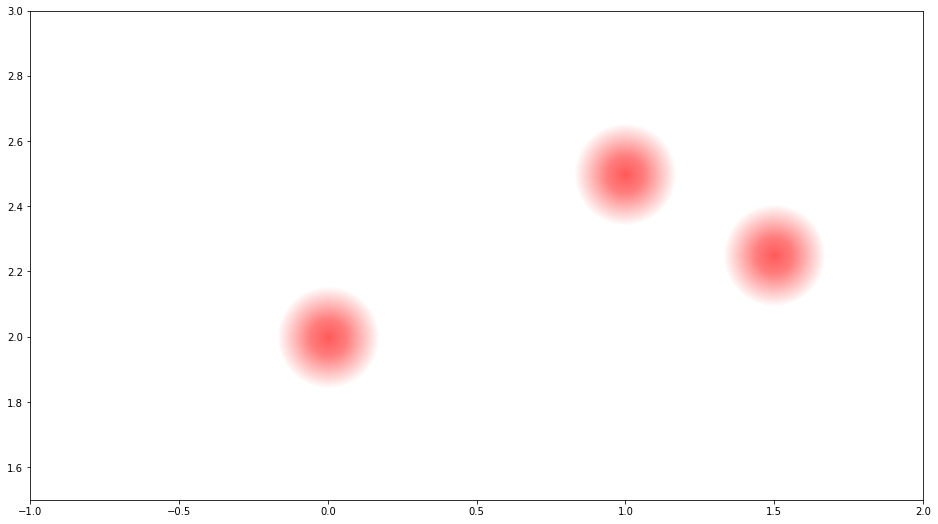

In [45]:
x = [0, 1, 1.5]
y = [2, 2.5, 2.25]

max_r = 10000
n = 100

for r in np.linspace(0, 1, n):
    plt.scatter(x, y, s=(r**2)*max_r, alpha=0.75/n, color='r')

plt.xlim(-1,2)
plt.ylim(1.5,3)

plt.show();

In [46]:
spray.head()

,Date,Latitude,Longitude,Year,DayofYear,WeekofYear
95,2011-09-07,41.981433,-87.787777,2011,250,35
96,2011-09-07,41.980998,-87.787778,2011,250,35
97,2011-09-07,41.980560,-87.787762,2011,250,35
98,2011-09-07,41.980198,-87.787758,2011,250,35
99,2011-09-07,41.979752,-87.787765,2011,250,35


In [47]:
def merge_stuff(test, spray):
    temp = test.groupby('WeekofYear').mean().reset_index()
    spray['NumSprays'] = 1
    temp2 = spray.groupby('WeekofYear').count().reset_index()

    temp3 = temp.merge(temp2, how='outer', on='WeekofYear')
    temp3.fillna(0, inplace=True)
    col = [c for c in temp3.columns if c not in ['WeekofYear', 'WnvPresent', 'NumSprays']]
    temp3.drop(col, axis='columns', inplace=True)
    if 'NumSprays' not in temp3.columns:
        temp3['NumSprays'] = 0
    
    return temp3

In [48]:
nw = merge_stuff(test_nw, spray_nw)
ne = merge_stuff(test_ne, spray_ne)
sw = merge_stuff(test_sw, spray_sw)
se = merge_stuff(test_se, spray_se)

In [49]:
ne

,WeekofYear,WnvPresent,NumSprays
0,20,0.000000,0.0
1,21,0.000000,0.0
2,22,0.000000,0.0
3,23,0.000000,0.0
4,24,0.000000,0.0
5,25,0.000000,0.0
6,26,0.000000,0.0
7,27,0.018237,0.0
8,28,0.044248,556.0
9,29,0.096953,483.0


<function matplotlib.pyplot.show>

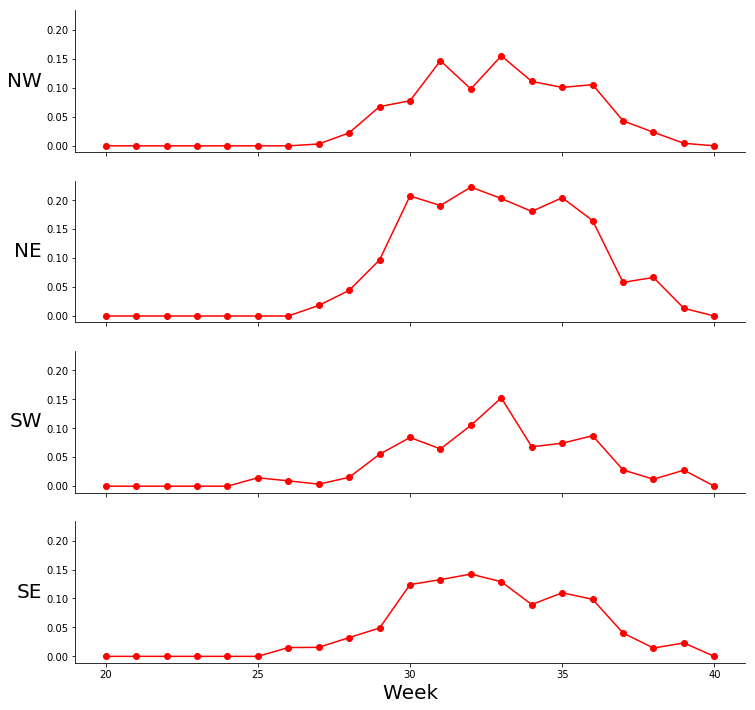

In [115]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex='all', sharey='all')

for ax, data, label in zip([ax1, ax2, ax3, ax4], [nw, ne, sw, se], ['nw', 'ne', 'sw', 'se']):
    ax.plot(data.WeekofYear, data.WnvPresent, '-or')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xticks([20, 25, 30, 35, 40])
    
    ax.set_ylabel(label.upper(),
                  fontsize=20, 
                  rotation='horizontal',
                  horizontalalignment='right',
                  verticalalignment='center')

ax.set_xlabel('Week',
              fontsize=20)
    
plt.rcParams["figure.figsize"] = [12, 12]
plt.show


In [51]:
data = pd.read_csv('data/raw/West_Nile_Virus__WNV__Mosquito_Test_Results.csv')
data = data[['SEASON YEAR', 'WEEK', 'TRAP', 'NUMBER OF MOSQUITOES', 'RESULT', 'LATITUDE', 'LONGITUDE']]
data.columns = ['year','week','trap','num_mosquitoes','wnv','latitude','longitude']


(-87.87171103958623, -87.5138221224138, 41.62411886805548, 42.0384020479445)

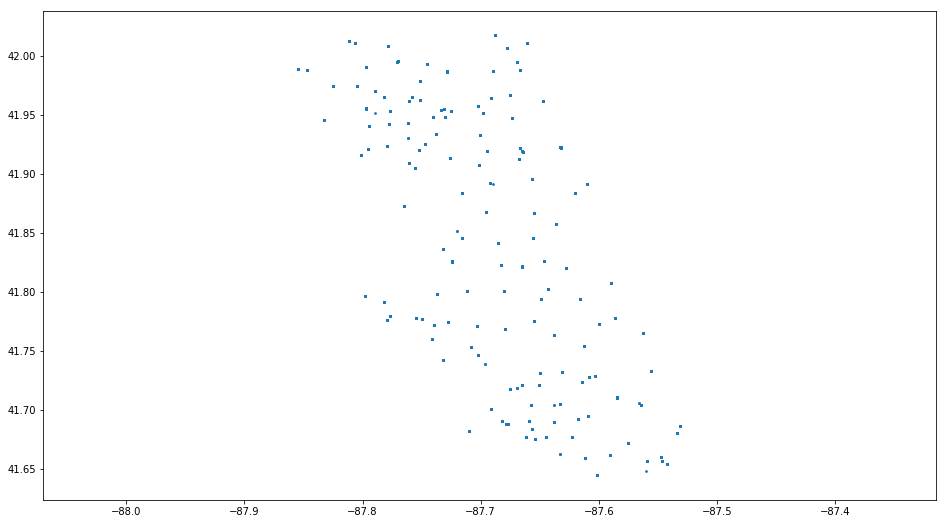

In [52]:
plt.scatter(data.longitude, data.latitude, s=3)
plt.axis('equal')